In [18]:
# 1
from random import randint

from numpy.ma.core import arange
from scipy.constants import point


def generate_random_birthdays(num: int) -> list:
    return [randint(1, 365) for _ in range(num)]

def check_same_birthday(birthdays: list) -> bool:
    for birthday in range(1, 366):
        if birthdays.count(birthday) > 1:
            return True
    return False

def estimated_same_birthday_probability(n: int, number_of_tests = 5000) -> float:
    same_birthday_count = 0
    for _ in range(number_of_tests):
        if check_same_birthday(generate_random_birthdays(n)):
            same_birthday_count += 1
    return same_birthday_count / number_of_tests
        

N = 26
print(estimated_same_birthday_probability(N, 10000))

0.6026


In [19]:
from math import perm
def same_birthday_probability(n: int) -> float:
    return 1 - perm(365, n) / 365**n

print(same_birthday_probability(26))


0.598240820135939


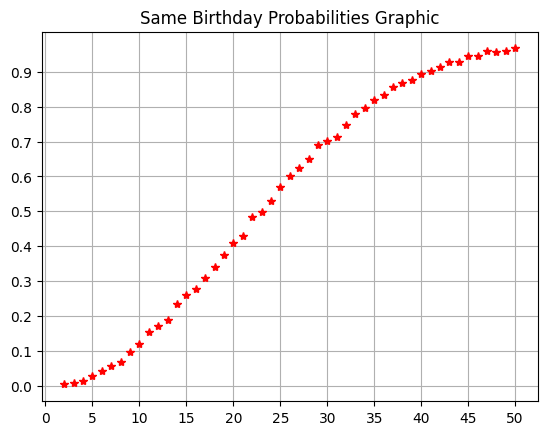

In [20]:
from numpy import arange
from matplotlib.pyplot import plot, grid, title, show, xticks, yticks

title('Same Birthday Probabilities Graphic')
xs = range(2, 51)
ys = [estimated_same_birthday_probability(x) for x in xs]
xticks(range(0, 51, 5))
yticks(arange(0, 1, 0.1))
plot(xs, ys, 'r*')
grid()
show()

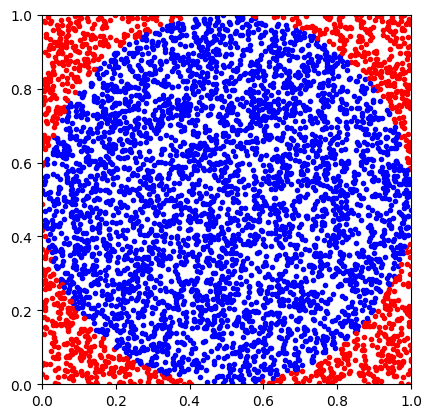

Relative frequency of points inside of circle is 0.7828
0.7853981633974483


In [101]:
from matplotlib.pyplot import axis
from random import random
from math import pi
axis('square')
axis((0,1,0,1))
N = 5000
# generating N random points
is_inside_circle = lambda pnt : (pnt[0] - 0.5)**2 + (pnt[1] - 0.5)**2 < 0.5**2

inside_circle_points = 0
for _ in range(N):
    F=(random(), random())
    if is_inside_circle(F):
        plot(F[0], F[1], 'b.')
        inside_circle_points += 1
    else:
        plot(F[0], F[1], 'r.')
# if we want to represent the circle
show()
relative_frequency = inside_circle_points/ N
print(f'Relative frequency of points inside of circle is {relative_frequency}')
print(pi*(0.5**2)/1)

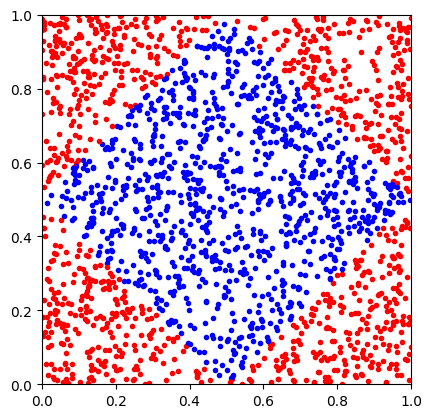

Relative frequency of points closer to center is 0.5015
0.5000000000000001


In [102]:
from math import dist
axis('square')
axis((0,1,0,1))
N = 2000

is_closer_to_center = lambda pnt : dist(pnt, (0.5, 0.5)) < dist(pnt, (0, 0)) and dist(pnt, (0.5, 0.5)) < dist(pnt, (1, 0)) and dist(pnt, (0.5, 0.5)) < dist(pnt, (0, 1)) and dist(pnt, (0.5, 0.5)) < dist(pnt, (1, 1)) 

closer_to_center_points = 0
for _ in range(N):
    F = (random(), random())
    if is_closer_to_center(F):
        plot(F[0], F[1], 'b.')
        closer_to_center_points += 1
    else:
        plot(F[0], F[1], 'r.')
        
relative_frequency = closer_to_center_points/ N
show()
print(f'Relative frequency of points closer to center is {relative_frequency}')
print((dist((0, 0.5), (0.5, 0))**2)/1)

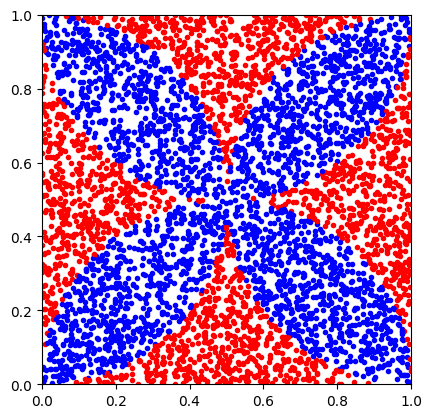

Relative frequency of points that make two acute and two obtuse triangles with the vertices of the square is 0.5664
0.5708


In [103]:
def makes_triangles(pnt: tuple) -> bool:
    distances_squared = [dist(pnt, (0, 0))**2,
                         dist(pnt, (1, 0))**2,
                         dist(pnt, (1, 1))**2,
                         dist(pnt, (0, 1))**2]
    acute_triangles = 0
    obtuse_triangles = 0
    
    if distances_squared[0] + distances_squared[1] < 1:
        acute_triangles += 1
    elif distances_squared[0] + distances_squared[1] > 1:
        obtuse_triangles += 1
        
    if distances_squared[1] + distances_squared[2] < 1:
        acute_triangles += 1
    elif distances_squared[1] + distances_squared[2] > 1:
        obtuse_triangles += 1
        
    if distances_squared[2] + distances_squared[3] < 1:
        acute_triangles += 1
    elif distances_squared[2] + distances_squared[3] > 1:
        obtuse_triangles += 1
        
    if distances_squared[3] + distances_squared[0] < 1:
        acute_triangles += 1
    elif distances_squared[3] + distances_squared[0] > 1:
        obtuse_triangles += 1
        
    if acute_triangles == 2 and obtuse_triangles == 2:
        return True
    return False


axis('square')
axis((0,1,0,1))
N = 5000
# generating N random points

valid_points = 0
for _ in range(N):
    F=(random(), random())
    if makes_triangles(F):
        plot(F[0], F[1], 'b.')
        valid_points += 1
    else:
        plot(F[0], F[1], 'r.')
    
show()

relative_frequency = valid_points/ N
print(f'Relative frequency of points that make two acute and two obtuse triangles with the vertices of the square is {relative_frequency}')
print(0.1427*4)